In [55]:
from fipy import *
from fipy.tools import numerix

In [56]:
diffCoeff = 1.  # diffúziós és konvekciós együtthatók
convCoeff = (10.,)  # vektornak kell lennie
sourceCoeff = 1.

R = 10.  # teljes hossz, amire lefut a program
nx = 1000  # ennyi részre lesz felosztva
mesh = Grid1D(dx=R / nx, nx=nx)  # új mesh nx számú dx széles lépésközzel

In [57]:
# határfeltételekhez adatok
valueLeft = 0.
gradLeft = (0.,)
valueRight = 0.

# "megoldási változó" - sűrűségfv létrehozása
f = CellVariable(mesh=mesh, name="sűrűségfv")

# határfeltételek érvényesítése
f.constrain(valueLeft, mesh.facesLeft)
# f.faceGrad.constrain(gradLeft, where=mesh.facesLeft)
f.constrain(valueRight, mesh.facesRight)

In [58]:
# az egyenlet alakja FiPy-ban az együtthatókkal
eq = (DiffusionTerm(coeff=diffCoeff)
      + PowerLawConvectionTerm(coeff=convCoeff)
      + sourceCoeff)

# az egyenlet megoldása "f"-re a megadott együtthatókkal
eq.solve(var=f, 
         solver=DefaultAsymmetricSolver(tolerance=1.e-15, iterations=10000))

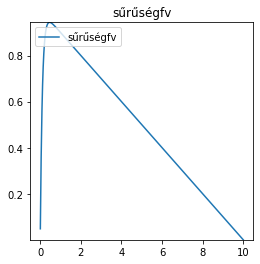

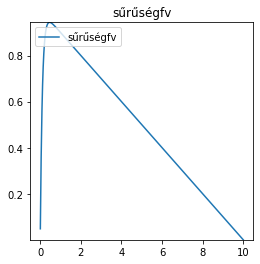

In [59]:
viewer = Viewer(vars=f)
viewer.plot()